In [3]:
import matplotlib
import matplotlib.pyplot as plt
import preprocess as prep
from collections import Counter
import math
import matplotlib.patches as mpatches

## Grocery Store Transactions

In [5]:
# playground
file = './dataset/GroceryStore/Groceries.csv'
tras = prep.process_groceries(prep.read_csv(file))
for t in tras[:10]:
    print(t)

['ready soups', 'semi-finished bread', 'margarine', 'citrus fruit']
['tropical fruit', 'coffee', 'yogurt']
['whole milk']
['cream cheese', 'meat spreads', 'pip fruit', 'yogurt']
['whole milk', 'other vegetables', 'long life bakery product', 'condensed milk']
['abrasive cleaner', 'whole milk', 'butter', 'rice', 'yogurt']
['rolls/buns']
['bottled beer', 'rolls/buns', 'UHT-milk', 'liquor (appetizer)', 'other vegetables']
['pot plants']
['whole milk', 'cereals']


In [13]:
file = './dataset/GroceryStore/Groceries.csv'
tras = prep.process_groceries(prep.read_csv(file))
item_counter = Counter()
for t in tras:
    item_counter += Counter(t)

items_freq = item_counter.most_common()
items = [pair[0] for pair in items_freq]
freq = [pair[1] for pair in items_freq]
print("items: ", len(items))

items:  169


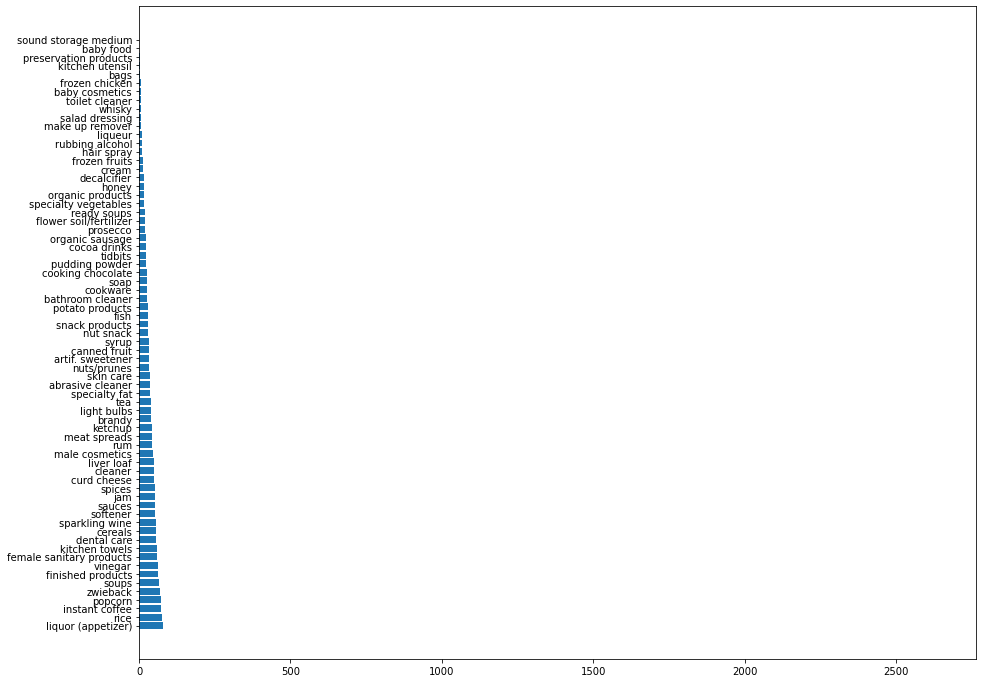

In [3]:
%matplotlib inline
max_f = max(freq)
plt.figure(figsize=(15, 12))
plt.xlim(0, int(max_f*1.1))
plt.barh(items[:50], freq[:50])
plt.savefig('imgs/0-49_item_freq.png')

plt.cla()
plt.xlim(0, int(max_f*1.1))
plt.barh(items[50:100], freq[50:100])
plt.savefig('imgs/50-99_item_freq.png')

plt.cla()
plt.xlim(0, int(max_f*1.1))
plt.barh(items[100:], freq[100:])
plt.savefig('imgs/100-{}_item_freq.png'.format(len(items)))

## UNIX Usage Cmds

### cmd only

In [2]:
file_fmt = './dataset/UNIX_usage/USER{}/sanitized_all.981115184025'
files = [file_fmt.format(i) for i in range(9)]

cmds_cnts = []
for f in files:
    cmd_cnt = Counter()
    sess = prep.process_sessions(prep.read_sessions(f), cmd_only=True)
    for s in sess:
        cmd_cnt += Counter(s)
    cmds_cnts.append(cmd_cnt)

In [9]:
for i in range(len(cmds_cnts)):
    print(len(cmds_cnts[i]))
    print(cmds_cnts[i].most_common(1))
    
tot_file = './dataset/UNIX_usage/all_users.981115184025'
tot_cnt = Counter()
sess = prep.process_sessions(prep.read_sessions(tot_file), cmd_only=True)
for s in sess:
    tot_cnt += Counter(s)
print(len(tot_cnt))
print(tot_cnt.most_common(1))

141
[('exit', 432)]
239
[('cd', 354)]
227
[('emacs', 329)]
228
[('lo', 400)]
354
[('logout', 559)]
361
[('cd', 277)]
462
[('elm', 1231)]
347
[('z', 737)]
500
[('z', 1173)]
1812
[('cd', 3676)]


141
0-50
imgs/USER0/0-50_cmd_freq.png
50-100
imgs/USER0/50-100_cmd_freq.png
100-141
imgs/USER0/100-141_cmd_freq.png
239
0-50
imgs/USER1/0-50_cmd_freq.png
50-100
imgs/USER1/50-100_cmd_freq.png
100-150
imgs/USER1/100-150_cmd_freq.png
150-200
imgs/USER1/150-200_cmd_freq.png
200-239
imgs/USER1/200-239_cmd_freq.png
227
0-50
imgs/USER2/0-50_cmd_freq.png
50-100
imgs/USER2/50-100_cmd_freq.png
100-150
imgs/USER2/100-150_cmd_freq.png
150-200
imgs/USER2/150-200_cmd_freq.png
200-227
imgs/USER2/200-227_cmd_freq.png
228
0-50
imgs/USER3/0-50_cmd_freq.png
50-100
imgs/USER3/50-100_cmd_freq.png
100-150
imgs/USER3/100-150_cmd_freq.png
150-200
imgs/USER3/150-200_cmd_freq.png
200-228
imgs/USER3/200-228_cmd_freq.png
354
0-50
imgs/USER4/0-50_cmd_freq.png
50-100
imgs/USER4/50-100_cmd_freq.png
100-150
imgs/USER4/100-150_cmd_freq.png
150-200
imgs/USER4/150-200_cmd_freq.png
200-250
imgs/USER4/200-250_cmd_freq.png
250-300
imgs/USER4/250-300_cmd_freq.png
300-350
imgs/USER4/300-350_cmd_freq.png
350-354
imgs/USER4/3

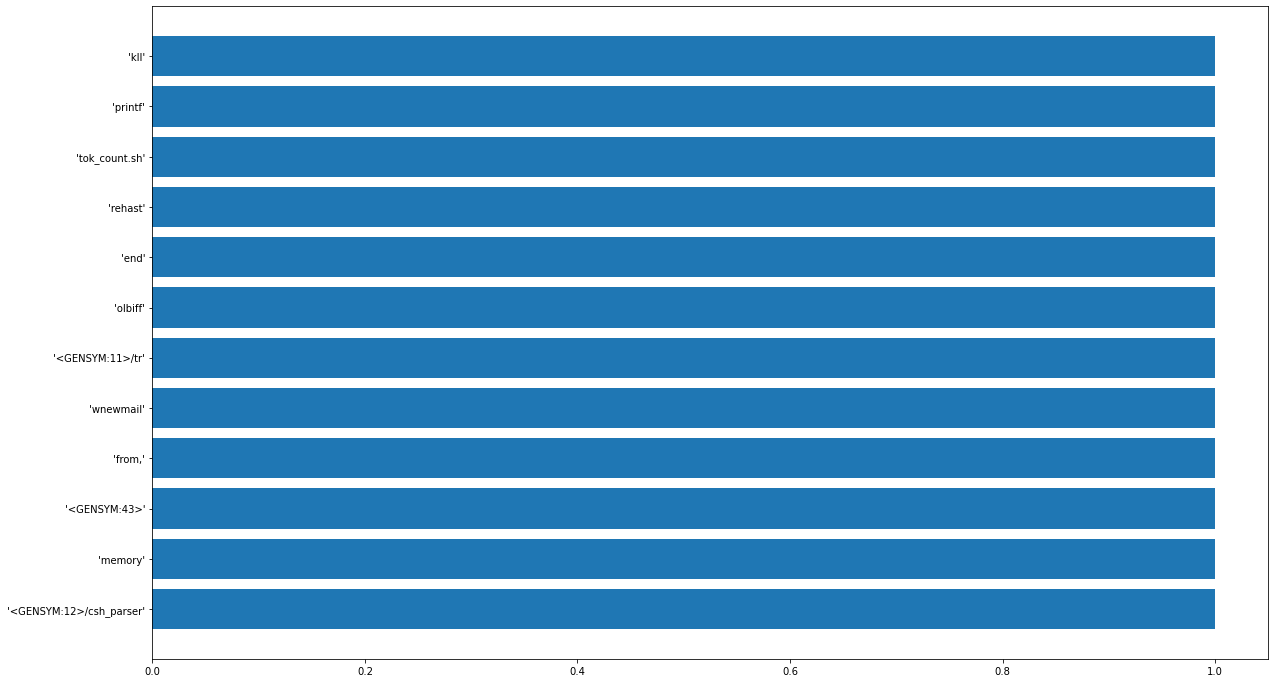

In [12]:
%matplotlib inline
plt.figure(figsize=(20, 12))
img_fmt = 'imgs/USER{}/{}-{}_cmd_freq.png'
for c in range(len(cmds_cnts)):
    cmd_freq = cmds_cnts[c].most_common()
    cmds = [repr(pair[0].replace('$$', '$2')) for pair in cmd_freq]
    freq = [pair[1] for pair in cmd_freq]
    
    num = math.ceil(len(cmds) / 50)
    print(len(cmds))
    for i in range(num):
        plt.cla()
        lo_idx = i * 50
        hi_idx = len(cmds) if (i+1)*50 > len(cmds) else (i+1)*50
        print('{}-{}'.format(lo_idx, hi_idx))
        plt.barh(cmds[lo_idx:hi_idx], freq[lo_idx:hi_idx])
        print(img_fmt.format(c, lo_idx, hi_idx))
        plt.savefig(img_fmt.format(c, lo_idx, hi_idx))
        
img_fmt = 'imgs/USER_ALL/{}-{}_cmd_freq.png'
cmd_freq = tot_cnt.most_common()
cmds = [repr(pair[0].replace('$$', '$2')) for pair in cmd_freq]
freq = [pair[1] for pair in cmd_freq]
num = math.ceil(len(cmds) / 50)
print(len(cmds))
for i in range(num):
    plt.cla()
    lo_idx = i * 50
    hi_idx = len(cmds) if (i+1)*50 > len(cmds) else (i+1)*50
    print('{}-{}'.format(lo_idx, hi_idx))
    plt.barh(cmds[lo_idx:hi_idx], freq[lo_idx:hi_idx])
    print(img_fmt.format(lo_idx, hi_idx))
    plt.savefig(img_fmt.format(lo_idx, hi_idx))

### consider all

In [21]:
file_fmt = './dataset/UNIX_usage/USER{}/sanitized_all.981115184025'
files = [file_fmt.format(i) for i in range(9)]

cmds_cnts = []
num_sess = []
for f in files:
    cmd_cnt = Counter()
    sess = prep.process_sessions(prep.read_sessions(f), cmd_only=False)
    for s in sess:
        cmd_cnt += Counter(s)
    cmds_cnts.append(cmd_cnt)
    num_sess.append(len(sess))

In [19]:
for i in range(len(cmds_cnts)):
    print(len(cmds_cnts[i]))
    print(cmds_cnts[i].most_common(1))
    
tot_file = './dataset/UNIX_usage/all_users.981115184025'
tot_cnt = Counter()
sess = prep.process_sessions(prep.read_sessions(tot_file), cmd_only=False)
for s in sess:
    tot_cnt += Counter(s)
print(len(tot_cnt))
print(tot_cnt.most_common(1))

195
[('exit', 432)]
286
[('<1>', 450)]
308
[('<1>', 476)]
271
[('lo', 400)]
477
[('logout', 559)]
561
[('<1>', 349)]
607
[('<1>', 1829)]
447
[('z', 737)]
704
[('z', 1173)]
2357
[('<1>', 5851)]


2357
0-50
imgs/USER_ALL_all/0-50_cmd_freq.png
50-100
imgs/USER_ALL_all/50-100_cmd_freq.png
100-150
imgs/USER_ALL_all/100-150_cmd_freq.png
150-200
imgs/USER_ALL_all/150-200_cmd_freq.png
200-250
imgs/USER_ALL_all/200-250_cmd_freq.png
250-300
imgs/USER_ALL_all/250-300_cmd_freq.png
300-350
imgs/USER_ALL_all/300-350_cmd_freq.png
350-400
imgs/USER_ALL_all/350-400_cmd_freq.png
400-450
imgs/USER_ALL_all/400-450_cmd_freq.png
450-500
imgs/USER_ALL_all/450-500_cmd_freq.png
500-550
imgs/USER_ALL_all/500-550_cmd_freq.png
550-600
imgs/USER_ALL_all/550-600_cmd_freq.png
600-650
imgs/USER_ALL_all/600-650_cmd_freq.png
650-700
imgs/USER_ALL_all/650-700_cmd_freq.png
700-750
imgs/USER_ALL_all/700-750_cmd_freq.png
750-800
imgs/USER_ALL_all/750-800_cmd_freq.png
800-850
imgs/USER_ALL_all/800-850_cmd_freq.png
850-900
imgs/USER_ALL_all/850-900_cmd_freq.png
900-950
imgs/USER_ALL_all/900-950_cmd_freq.png
950-1000
imgs/USER_ALL_all/950-1000_cmd_freq.png
1000-1050
imgs/USER_ALL_all/1000-1050_cmd_freq.png
1050-1100


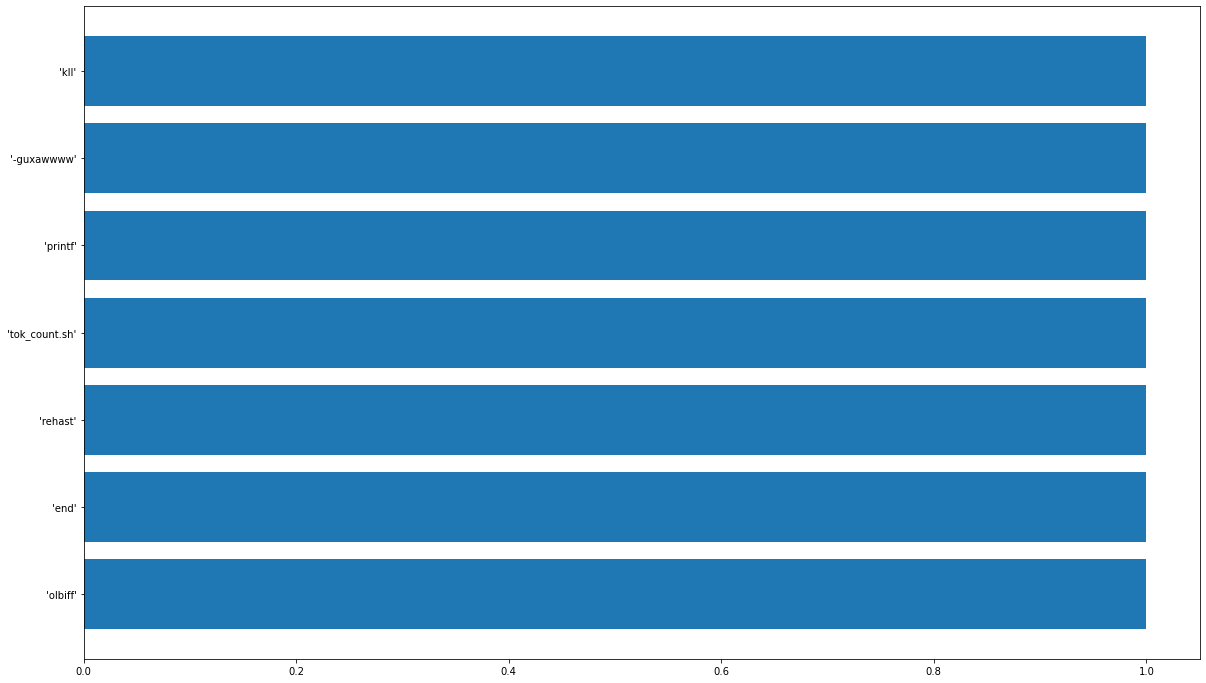

In [20]:
%matplotlib inline
plt.figure(figsize=(20, 12))
img_fmt = 'imgs/USER{}_all/{}-{}_cmd_freq.png'
for c in range(len(cmds_cnts)):
    cmd_freq = cmds_cnts[c].most_common()
    cmds = [repr(pair[0].replace('$$', '$2')) for pair in cmd_freq]
    freq = [pair[1] for pair in cmd_freq]
    
    num = math.ceil(len(cmds) / 50)
    print(len(cmds))
    for i in range(num):
        plt.cla()
        lo_idx = i * 50
        hi_idx = len(cmds) if (i+1)*50 > len(cmds) else (i+1)*50
        print('{}-{}'.format(lo_idx, hi_idx))
        plt.barh(cmds[lo_idx:hi_idx], freq[lo_idx:hi_idx])
        print(img_fmt.format(c, lo_idx, hi_idx))
        plt.savefig(img_fmt.format(c, lo_idx, hi_idx))
        
img_fmt = 'imgs/USER_ALL_all/{}-{}_cmd_freq.png'
cmd_freq = tot_cnt.most_common()
cmds = [repr(pair[0].replace('$$', '$2')) for pair in cmd_freq]
freq = [pair[1] for pair in cmd_freq]
num = math.ceil(len(cmds) / 50)
print(len(cmds))
for i in range(num):
    plt.cla()
    lo_idx = i * 50
    hi_idx = len(cmds) if (i+1)*50 > len(cmds) else (i+1)*50
    print('{}-{}'.format(lo_idx, hi_idx))
    plt.barh(cmds[lo_idx:hi_idx], freq[lo_idx:hi_idx])
    print(img_fmt.format(lo_idx, hi_idx))
    plt.savefig(img_fmt.format(lo_idx, hi_idx))

In [22]:
names = ['USER'+str(i) for i in range(9)]
num_cmds = [len(c) for c in cmds_cnts]

<Figure size 432x288 with 0 Axes>

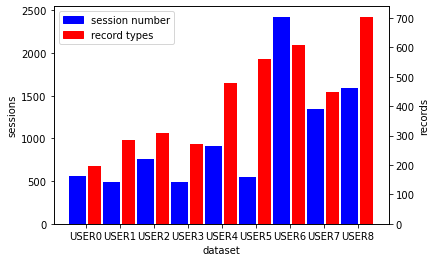

In [41]:
import numpy as np

tick_step = 2
group_gap = 0
bar_gap = 0

ticks = np.arange(len(names)) * tick_step
group_num = 2
group_width = tick_step - group_gap
bar_span = group_width / group_num
bar_width = bar_span - bar_gap
baseline_x = ticks - (group_width - bar_span) / 2

plt.figure()
fig, ax = plt.subplots()
ax.bar(baseline_x, num_sess, bar_width, label='session number', color='b')
ax.set_xlabel('dataset')
ax.set_ylabel('sessions')
ax1 = ax.twinx()
ax1.bar(baseline_x + bar_span, num_cmds, label='record types', color='r')
ax1.set_ylabel('records')
plt.xticks(ticks, names)
sess_patch = mpatches.Patch(lw=1, linestyle='-', color='blue', label='session number')
cmd_patch = mpatches.Patch(lw=1, linestyle='-', color='red', label='record types')
ax.legend(handles=[sess_patch, cmd_patch])
fig.savefig('imgs/unix_all_number.png')

### take union of 0 and 1

In [2]:
file_fmt = './dataset/UNIX_usage/USER{}/sanitized_all.981115184025'
files = [file_fmt.format(i) for i in range(9)]

with open('./dataset/UNIX_usage/USER01/sanitized_all.981115184025', 'w') as fw:
    for i in range(2):
        with open(files[i], 'r') as fr:
            fw.write(fr.read())